In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


In [2]:
import matplotlib.pyplot as plt

def plot_digit(image_data, axis=False):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")

    if not axis:
        plt.axis("off")

In [3]:
def plot_multi(img,start=0,end=100):
    plt.figure(figsize=(9, 9))
    for idx, image_data in enumerate(img[start:end]):
        plt.subplot(10, 10, idx + 1)
        plot_digit(image_data)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

## data preparation

In [4]:
from pathlib import Path

# this is where the datasets are located
path = Path() / "dataset_cleaned"
print(path)

dataset_cleaned


In [5]:
# your training datasets
# must be cleaned

my_data_num = np.load(path / "digit_data_TrVal_corrected.npz")
my_data_sym = np.load(path / "op_data_TrVal_corrected.npz")

## dot deletion

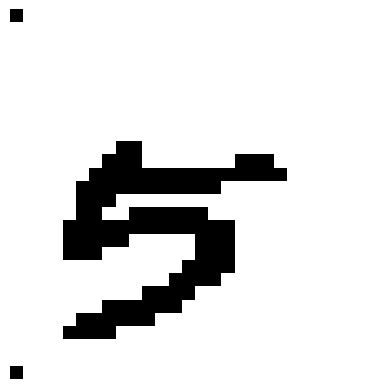

In [6]:
sample = my_data_num["img"][40]
plot_digit(sample)

we can see that some data includes some dot noise, which our **border_del()** cannot do anything
the plan is simple, by using dfs, we can detect the cluster's size, and determine whether it's a real data or
it's a not(like size of 3~5)

In [7]:
def dfs(r,c,img, visited):
    st = list()
    st.append([r,c])
    
    cord = [[1,1],[1,0],[1,-1],[0,1],[0,-1],[-1,1],[-1,0],[-1,-1]]
    
    dot = list()
    
    while st:
        curr = st.pop()
        
        if visited[curr[0]][curr[1]] == 1.: continue
        
        dot.append(curr)
        visited[curr[0]][curr[1]] = 1.
        
        for n,m in enumerate(cord):
            row = curr[0] + m[0]
            col = curr[1] + m[1]
            
            if 0 <= row < 28 and 0 <= col < 28:
                if img[row][col] != 0. and visited[row][col] == 0.:
                    st.append([row,col])
            
    
    return dot,visited

In [8]:
def dfs_search(img):
    
    # to check whether we visited
    isVisited = np.full((28,28),0.)
    
    # dots that needs to be deleted afterwards
    dots = list()
    
    for i in range(28):
        for j in range(28):
            if img[i][j] != 0. and not isVisited[i][j]:
                dot, isVisited = dfs(i,j,img,isVisited)
                
                if len(dot) <= 4:
                    dots.extend(dot)
    
    
    return dots

In [9]:
t = dfs_search(sample)

In [10]:
t

[[0, 0], [27, 0]]

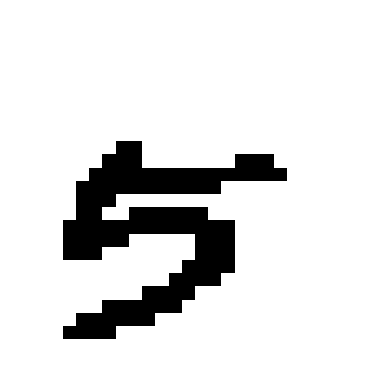

In [13]:
for i,j in enumerate(t):
    sample[j[0],j[1]] = 0.
plot_digit(sample)

there! let's try other images, just in case

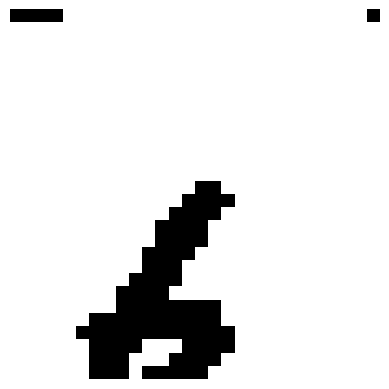

In [21]:
sample_other = my_data_num["img"][35]
plot_digit(sample_other)

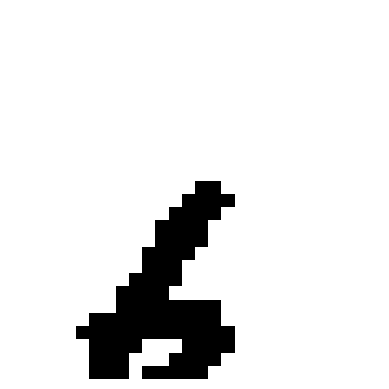

In [22]:
t_other = dfs_search(sample_other)

for i,j in enumerate(t_other):
    sample_other[j[0],j[1]] = 0.
plot_digit(sample_other)


nice! also finding the appropriate dot size(that should be deleted) may be crucial